### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

2. Investigate the dataset for missing or problematic data.

In [20]:

data.isnull().sum()


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [21]:

data.dtypes


destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [23]:

data.duplicated().sum()


np.int64(74)

3. Decide what to do about your missing data -- drop, replace, other...

In [25]:
data.drop(columns=['car'], inplace=True)

In [33]:
cols_to_fill = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

for col in cols_to_fill:
    data[col].fillna(data[col].mode()[0], inplace=True)


In [34]:
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [36]:
# Total number of observations
total = len(data)

# Number of people who accepted the coupon (Y == 1)
accepted = data['Y'].sum()  # Since values are 1s and 0s, sum gives the count of 1s

# Proportion of accepted coupons
proportion = accepted / total

print(f"Proportion of accepted coupons: {proportion:.2%}")

Proportion of accepted coupons: 56.84%


5. Use a bar plot to visualize the `coupon` column.

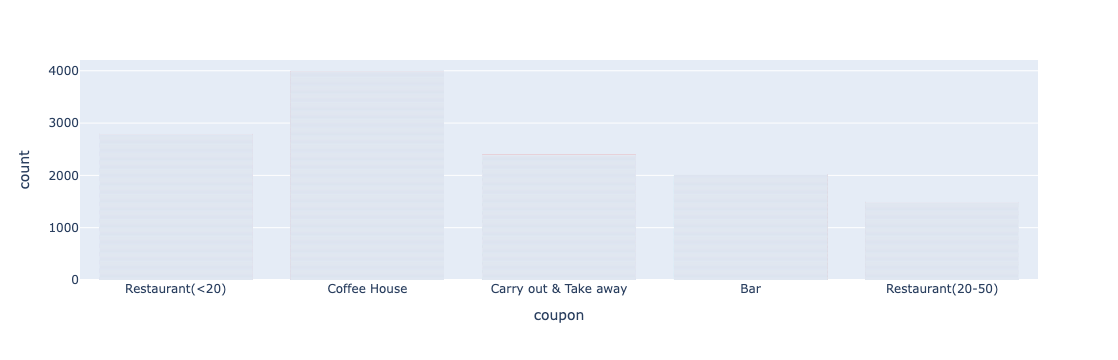

In [48]:
px.bar(data, x='coupon',color_discrete_sequence=['red'])

6. Use a histogram to visualize the temperature column.

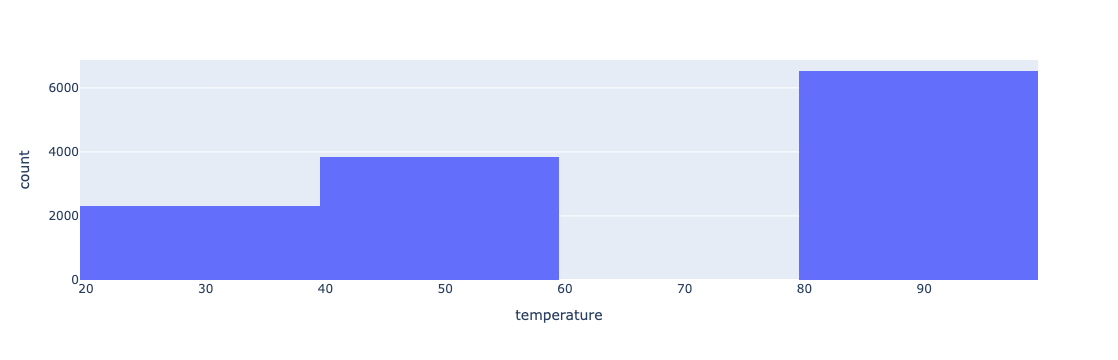

In [49]:
px.histogram (data, x='temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [51]:
bar_coupons_df = data[data['coupon'] == 'Bar']


2. What proportion of bar coupons were accepted?


In [52]:
total = len(bar_coupons_df)
accepted = bar_coupons_df['Y'].sum()
bar_proportion = accepted / total

print(f"bar_proportion of accepted coupons: {bar_proportion:.2%}")

bar_proportion of accepted coupons: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [57]:
data['Bar'].sample(100)

6880     never
1213       1~3
9007     less1
2028     less1
5936       gt8
         ...  
6269     less1
7361     never
10324    never
7492       4~8
10457    never
Name: Bar, Length: 100, dtype: object

In [57]:
data['Bar'].sample(100)

6880     never
1213       1~3
9007     less1
2028     less1
5936       gt8
         ...  
6269     less1
7361     never
10324    never
7492       4~8
10457    never
Name: Bar, Length: 100, dtype: object

In [64]:
data['Bar'].unique ()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

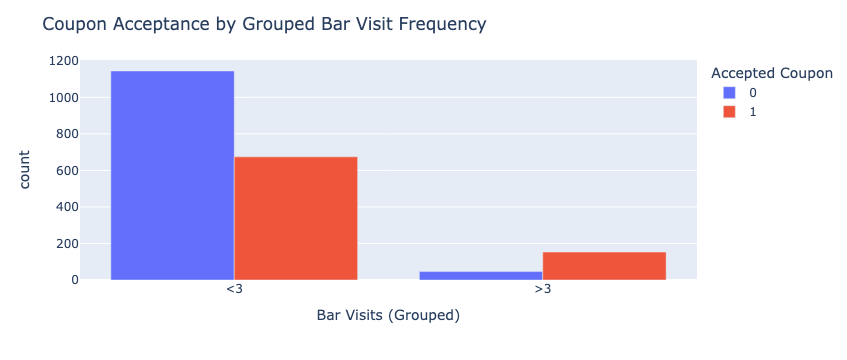

In [73]:
# Define mapping function
def group_bar_usage(value):
    if value in ['never', 'less1', '1~3']:
        return '<3'
    elif value in ['4~8', 'gt8']:
        return '>3'
    else:
        return 'Unknown'  # Just in case there's missing or unexpected data

# Apply the function to create a new column
bar_coupons_df.loc[:, 'Bar_group'] = bar_coupons_df['Bar'].apply(group_bar_usage)
# Group by the new Bar_group and Y
grouped = bar_coupons_df.groupby(['Bar_group', 'Y']).size().reset_index(name='count')
grouped['Y'] = grouped['Y'].astype(str)

# Bar plot
import plotly.express as px
fig = px.bar(
    grouped,
    x='Bar_group',
    y='count',
    color='Y',
    barmode='group',
    labels={'Bar_group': 'Bar Visits (Grouped)', 'Y': 'Accepted Coupon'}
)
fig.update_layout(title='Coupon Acceptance by Grouped Bar Visit Frequency')
fig.show()



4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [96]:
# Define mapping function
def group_bar_usage_binary(value):
    if value in ['never', 'less1']:
        return '<1'
    elif value in ['1~3','4~8', 'gt8']:
        return '>1' 

# Make a copy of the original dataframe 
bar_coupons_df = bar_coupons_df.copy()

# Apply the function to create a new column

bar_coupons_df['Bar_binary'] = bar_coupons_df['Bar'].apply(group_bar_usage_binary)

# Convert 'age' column to numeric type
bar_coupons_df['age'] = pd.to_numeric(bar_coupons_df['age'], errors='coerce')

# Filter the dataframe
filtered_df = bar_coupons_df[(bar_coupons_df['Bar_binary'] == '>1') & (bar_coupons_df['age'] > 25)]

# Calculate acceptance rate
acceptance_rate = filtered_df['Y'].mean()

# Format as percentage
print(f"Acceptance rate for Bar > 1 and Age > 25: {acceptance_rate:.2%}")




Acceptance rate for Bar > 1 and Age > 25: 69.97%


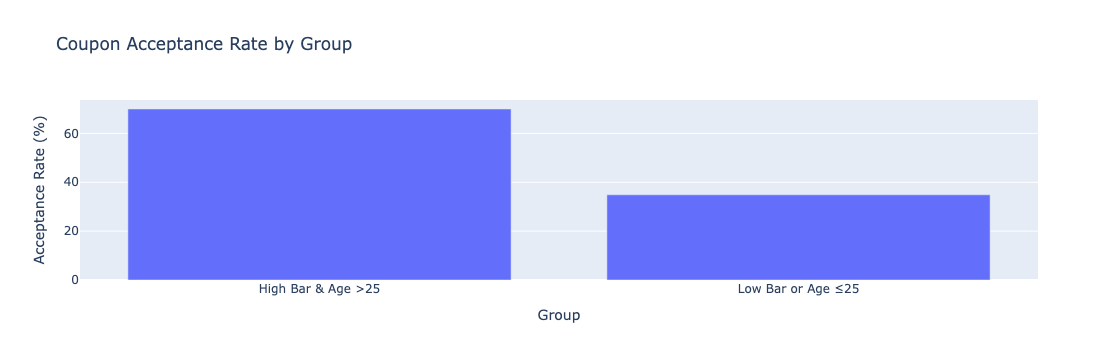

In [98]:
# Create a new column that flags whether each row is in Group 1 or 2
def define_group(row):
    if row['Bar_binary'] == '>1' and row['age'] > 25:
        return 'High Bar & Age >25'
    else:
        return 'Low Bar or Age ≤25'

bar_coupons_df.loc[:, 'Group'] = bar_coupons_df.apply(define_group, axis=1)

# Get total counts per group
total_per_group = bar_coupons_df.groupby('Group')['Y'].count().reset_index(name='total')

# Get acceptance counts
accepted_per_group = bar_coupons_df[bar_coupons_df['Y'] == 1].groupby('Group')['Y'].count().reset_index(name='accepted')

# Merge and compute rate
merged = pd.merge(total_per_group, accepted_per_group, on='Group')
merged['acceptance_rate'] = merged['accepted'] / merged['total'] * 100

# Plot acceptance rate
fig = px.bar(merged, 
             x='Group', 
             y='acceptance_rate', 
             title='Coupon Acceptance Rate by Group',
             labels={'acceptance_rate': 'Acceptance Rate (%)'})

fig.show()


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


          Group  count    sum  acceptance_rate
0        Others   1466  434.0        29.604366
1  Target Group    551  393.0        71.324864


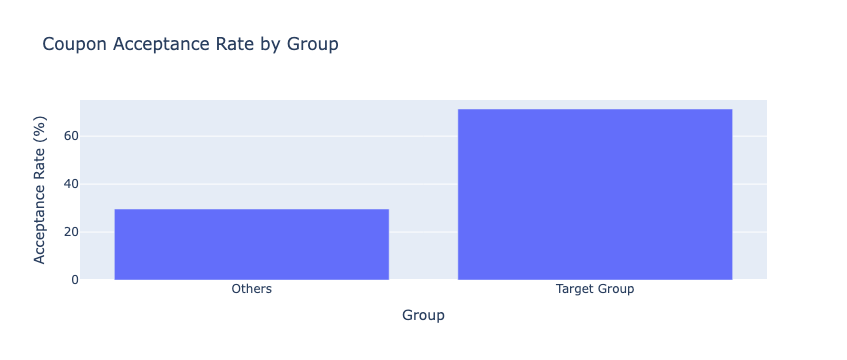

In [165]:
#define mapping function
bar_usage_high = ['1~3', '4~8', 'gt8']
non_kid_passengers = ['Alone', 'Partner', 'Friend(s)']
excluded_occupation = 'Farming Fishing & Forestry'
#create filtered dataset
filtered_df = bar_coupons_df[(bar_coupons_df['Bar'].isin(bar_usage_high)) &
    (bar_coupons_df['passanger'].isin(non_kid_passengers)) &
    (bar_coupons_df['occupation'] != excluded_occupation)]
#create new column
def label_group(row):
    if (row['Bar'] in bar_usage_high) and \
       (row['passanger'] in non_kid_passengers) and \
       (row['occupation'] != excluded_occupation):
        return 'Target Group'
    else:
        return 'Others'

# Apply it to the full DataFrame
bar_coupons_df['Group'] = bar_coupons_df.apply(label_group, axis=1)

# Count total and accepted
group_counts = bar_coupons_df.groupby('Group')['Y'].agg(['count', 'sum']).reset_index()
group_counts['acceptance_rate'] = group_counts['sum'] / group_counts['count'] * 100

print(group_counts)

#plot the results

fig = px.bar(group_counts, 
             x='Group', 
             y='acceptance_rate',
             title='Coupon Acceptance Rate by Group',
             labels={'acceptance_rate': 'Acceptance Rate (%)'})
fig.show()
        

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



  group_sixth  count    sum  acceptance_rate
0  goal group    551  393.0        71.324864
1      others   1466  434.0        29.604366


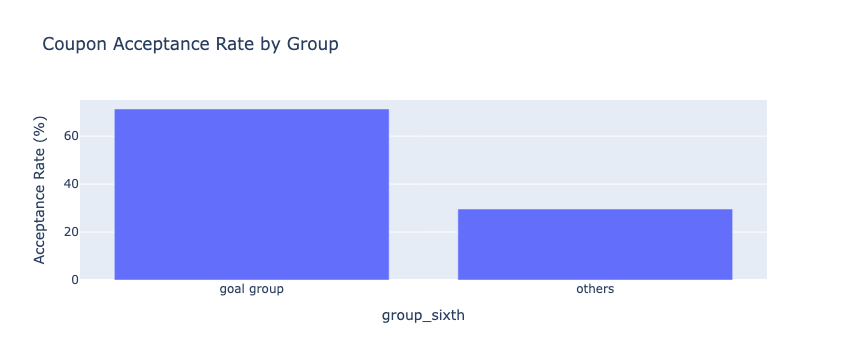

In [169]:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
# define mapping function
Bars_high_visit=['1~3', '4~8', 'gt8']
Non_kid_passenger= ['Alone', 'Partner', 'Friend(s)']
Widow_excluded = 'Widowed'
cheap_restaurant=['4~8','gt8']
Income_less='$37500 - $49999'

#create filtered dataset
filtered_df= bar_coupons_df[(bar_coupons_df['Bar'].isin(Bars_high_visit)) & (bar_coupons_df['passanger'].isin(Non_kid_passenger)) & (bar_coupons_df['maritalStatus']!= Widow_excluded)]
#create new column
def label_group(row):
    if(row ['Bar'] in Bars_high_visit) and\
    (row['passanger']in Non_kid_passenger) and\
    (row ['maritalStatus'] != Widow_excluded):
        return 'goal group'
    else:
        return 'others'
        
#apply to full dataframe

bar_coupons_df['group_sixth']= bar_coupons_df.apply(label_group, axis=1)


# Count total and accepted
group_counts = bar_coupons_df.groupby('group_sixth')['Y'].agg(['count', 'sum']).reset_index()
group_counts['acceptance_rate'] = group_counts['sum'] / group_counts['count'] * 100

print(group_counts)

#plot the results

fig = px.bar(group_counts, 
             x='group_sixth', 
             y='acceptance_rate',
             title='Coupon Acceptance Rate by Group',
             labels={'acceptance_rate': 'Acceptance Rate (%)'})
fig.show()
        

  group_seventh  count    sum  acceptance_rate
0     group_age    335  245.0        73.134328
1        others   1682  582.0        34.601665


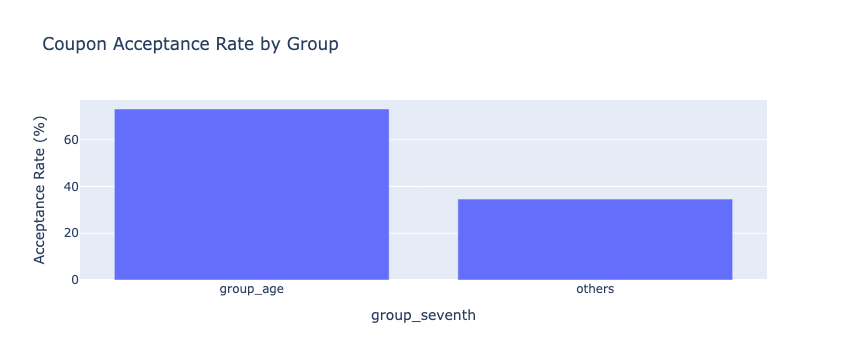

In [168]:
#Go to bars more than once a month and are under the age of 30 OR
#create filtered dataset
filtered_df_age= bar_coupons_df[(bar_coupons_df['Bar'].isin(Bars_high_visit)) & (bar_coupons_df['age'] < 30)]

#create new column
def binary_group(row):
    if(row ['Bar'] in Bars_high_visit) and\
    (row['age']<30): 
    
        return 'group_age'
    else:
        return 'others'

#apply to full dataframe

bar_coupons_df['group_seventh']= bar_coupons_df.apply(binary_group, axis=1)

# Count total and accepted

group_counts = bar_coupons_df.groupby('group_seventh')['Y'].agg(['count', 'sum']).reset_index()
group_counts['acceptance_rate'] = group_counts['sum'] / group_counts['count'] * 100

print(group_counts)

#plot the results

fig = px.bar(group_counts, 
             x='group_seventh', 
             y='acceptance_rate',
             title='Coupon Acceptance Rate by Group',
             labels={'acceptance_rate': 'Acceptance Rate (%)'})
fig.show()


   group_eighth  count    sum  acceptance_rate
0  group_income     98   48.0        48.979592
1        others   1919  779.0        40.594059


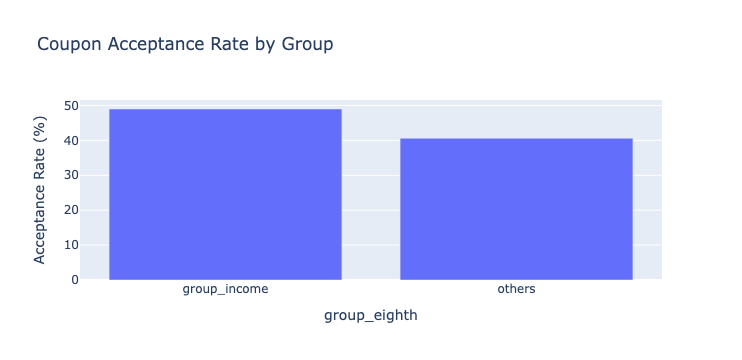

In [173]:
#go to cheap restaurants more than 4 times a month and income is less than 50K
#create filtered dataset
filtered_df_income= bar_coupons_df[(bar_coupons_df['RestaurantLessThan20'].isin([cheap_restaurant])) & (bar_coupons_df['income'].isin([Income_less]))]
#create new column
def label_Binary(row):
    if(row ['RestaurantLessThan20'] in cheap_restaurant) and\
    (row['income']in Income_less):
        return 'group_income'
    else:
        return 'others'

#apply to full dataframe

bar_coupons_df['group_eighth']= bar_coupons_df.apply(label_Binary, axis=1)

# Count total and accepted

group_counts = bar_coupons_df.groupby('group_eighth')['Y'].agg(['count', 'sum']).reset_index()
group_counts['acceptance_rate'] = group_counts['sum'] / group_counts['count'] * 100

print(group_counts)

#plot the results

fig = px.bar(group_counts, 
             x='group_eighth', 
             y='acceptance_rate',
             title='Coupon Acceptance Rate by Group',
             labels={'acceptance_rate': 'Acceptance Rate (%)'})
fig.show()



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
#those who go to Bars more than once/month, with an age of >25 and <30, ad passengers that were not a kid, had occupations other than farming, fishing, or forestry, are not widowed, go to cheap restaurants more than 4 times a month and income is less than 50K are more likely to accept the bar coupons 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [174]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

In [ ]:
#coupon= Restaurant(<20).   age (<30, passanger has kid, occupation.., has_children, income   

In [176]:
#create a new dataframe containing coupon: Restaurant (<20)
Restaurant_20_df = data[data['coupon'] == 'Restaurant(<20)']

In [177]:
total = len(Restaurant_20_df)
accepted = Restaurant_20_df['Y'].sum()
restaurant_proportion = accepted / total

print(f"restaurant_proportion of accepted coupons: {restaurant_proportion:.2%}")

restaurant_proportion of accepted coupons: 70.71%


   group_young  count   sum  acceptance_rate
0  group_young     81    63        77.777778
1       others   2705  1907        70.499076


/var/folders/7v/y43jl_bj58gdlpljts182dkr0000gn/T/ipykernel_97601/743388740.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



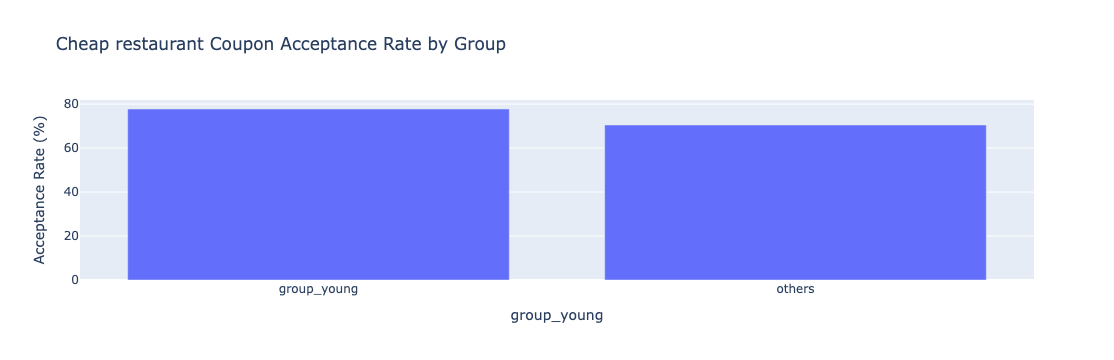

In [190]:
# define mapping function
marital_single = ['Single', 'Divorced', 'Widowed']
has_children = [1]
unemployed_excluded = ['Unemployed'] 
cheap_restaurant = ['4~8', 'gt8']
Income_less = '$37500 - $49999'

# create filtered dataset
filtered_df_restaurant = Restaurant_20_df[
    (Restaurant_20_df['maritalStatus'].isin(marital_single)) &  
    (Restaurant_20_df['RestaurantLessThan20'].isin(cheap_restaurant)) &  
    (Restaurant_20_df['age'] < 30) & 
    (Restaurant_20_df['income'] == Income_less) &  
    (Restaurant_20_df['occupation'] != unemployed_excluded[0]) &  
    (Restaurant_20_df['has_children'] == has_children[0])]


#1- compare the acceptance rate between those who are younger than 30, single and have low income
create new columns for young, single, and low income
def young_group(row):
    if(row ['maritalStatus'] in marital_single) and\
    (row['age']<30) and (row ['income']in Income_less): 
    
        return 'group_young'
    else:
        return 'others'


#apply to full dataframe

Restaurant_20_df['group_young']= Restaurant_20_df.apply(young_group, axis=1)


# Count total and accepted

group_counts = Restaurant_20_df.groupby('group_young')['Y'].agg(['count', 'sum']).reset_index()
group_counts['acceptance_rate'] = group_counts['sum'] / group_counts['count'] * 100

print(group_counts)

#plot the results

fig = px.bar(group_counts, 
             x='group_young', 
             y='acceptance_rate',
             title='Cheap restaurant Coupon Acceptance Rate by Group',
             labels={'acceptance_rate': 'Acceptance Rate (%)'})
fig.show()




   single_young  count   sum  acceptance_rate
0        others   2527  1790        70.834982
1  single_group    259   180        69.498069


/var/folders/7v/y43jl_bj58gdlpljts182dkr0000gn/T/ipykernel_97601/2433543331.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



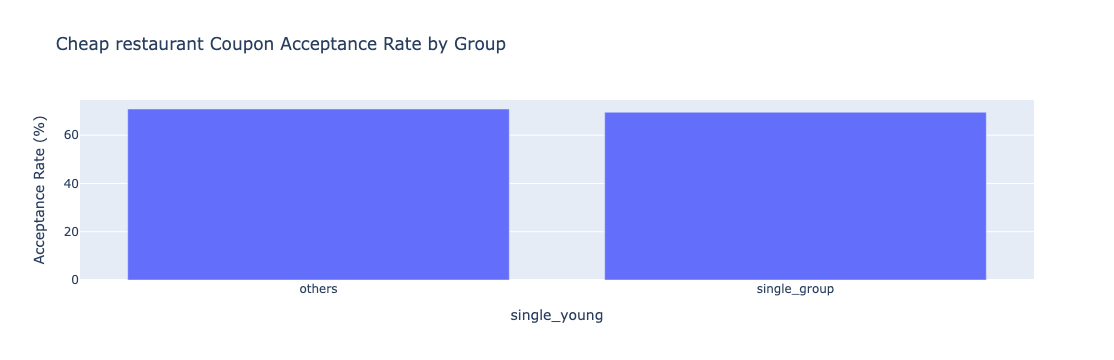

In [198]:
#2- compare the acceptance rate between those who are single, and have no children

# create new columns for single, and have no children
def single_group(row):
    if (row['maritalStatus'] in marital_single) and (row['has_children'] in has_children): 
        return 'single_group'
    else:
        return 'others'


#apply to full dataframe
Restaurant_20_df['single_young'] = Restaurant_20_df.apply(single_group, axis=1)


# Count total and accepted
group_counts = Restaurant_20_df.groupby('single_young')['Y'].agg(['count', 'sum']).reset_index()
group_counts['acceptance_rate'] = group_counts['sum'] / group_counts['count'] * 100

print(group_counts)

#plot the results
fig = px.bar(group_counts, 
             x='single_young', 
             y='acceptance_rate',
             title='Cheap restaurant Coupon Acceptance Rate by Group',
             labels={'acceptance_rate': 'Acceptance Rate (%)'})
fig. show ()

   poor_group  count   sum  acceptance_rate
0      others   2642  1869        70.741862
1  poor_group    144   101        70.138889


/var/folders/7v/y43jl_bj58gdlpljts182dkr0000gn/T/ipykernel_97601/3315346697.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



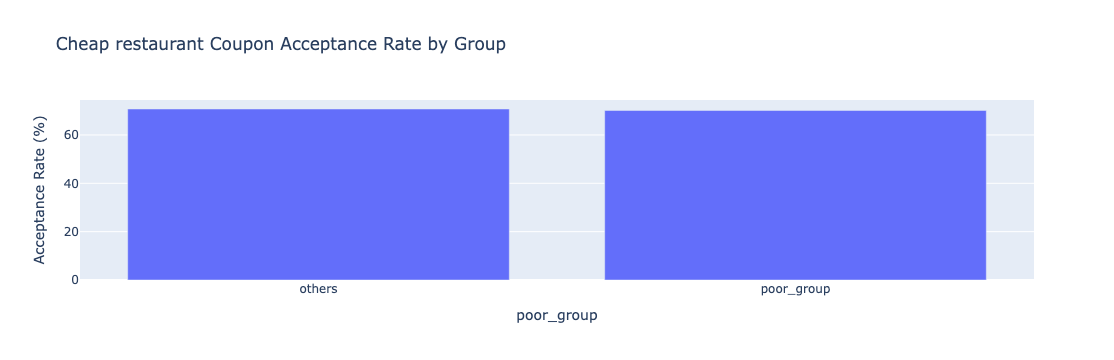

In [199]:
#3- compare the acceptance rate between those who visit cheap_restaurant > 4 times and have low income 


# create new columns for those who visit cheap_restaurants frequently and have low income
def poor_group(row):
    if (row['RestaurantLessThan20'] in cheap_restaurant) and (row ['income']in Income_less): 
        return 'poor_group'
    else:
        return 'others'


#apply to full dataframe
Restaurant_20_df['poor_group'] = Restaurant_20_df.apply(poor_group, axis=1)


# Count total and accepted
group_counts = Restaurant_20_df.groupby('poor_group')['Y'].agg(['count', 'sum']).reset_index()
group_counts['acceptance_rate'] = group_counts['sum'] / group_counts['count'] * 100

print(group_counts)

#plot the results
fig = px.bar(group_counts, 
             x='poor_group', 
             y='acceptance_rate',
             title='Cheap restaurant Coupon Acceptance Rate by Group',
             labels={'acceptance_rate': 'Acceptance Rate (%)'})
fig. show ()

   restaurant_group  count   sum  acceptance_rate
0            others   1698  1177        69.316843
1  restaurant_group   1088   793        72.886029


/var/folders/7v/y43jl_bj58gdlpljts182dkr0000gn/T/ipykernel_97601/2198638872.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



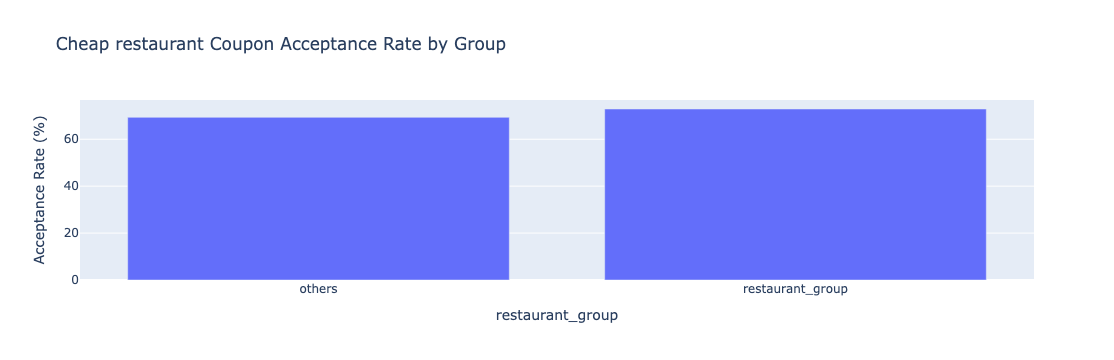

In [201]:
#3- compare the acceptance rate between those who visit cheap_restaurant > 4 times 


# create new columns for those visit cheap restaurants frequently 

def restaurant_group(row):
    if (row['RestaurantLessThan20'] in cheap_restaurant): 
        return 'restaurant_group'
    else:
        return 'others'


#apply to full dataframe
Restaurant_20_df['restaurant_group'] = Restaurant_20_df.apply(restaurant_group, axis=1)


# Count total and accepted
group_counts = Restaurant_20_df.groupby('restaurant_group')['Y'].agg(['count', 'sum']).reset_index()
group_counts['acceptance_rate'] = group_counts['sum'] / group_counts['count'] * 100

print(group_counts)

#plot the results
fig = px.bar(group_counts, 
             x='restaurant_group', 
             y='acceptance_rate',
             title='Cheap restaurant Coupon Acceptance Rate by Group',
             labels={'acceptance_rate': 'Acceptance Rate (%)'})
fig. show ()